In [2]:
import monkdata as m
import pandas as pd
import dtree as dt
import drawtree_qt5 as draw
import random
import numpy as np
import matplotlib.pyplot as plt

## Assignment 0
Q. Each one of the datasets has properties which makes them hard to learn. Motivate which of the three problems is most difficult for a decision tree algorithm to learn.

A. The condition for MONK-3 would be represented as a deeper tree. Therefore there should be more splits to be made one would therefore argue that it takes more time to learn. The lower number of trained dataset could be indicating that Monk-3 is also harder to learn. Moreover, there's misclassification of the training dataset of 5% - the noisiness can lead to overfit of the training data and further worse performance on the test data. Although, the most difficult one depends on how informative the training set which we haven't really looked into yet.  

## Assignment 1

Q. Assignment 1: The file dtree.py defines a function entropy which calculates the entropy of a dataset. Import this file along with the monks datasets and use it to calculate the entropy of the training datasets.

In [45]:
#calculating entroy of each dataset
m1 = dt.entropy(m.monk1)
m2 = dt.entropy(m.monk2)
m3 = dt.entropy(m.monk3)

#visualizing entropy
df = pd.DataFrame([m1,m2,m3])
df.columns = ['Entropy']
new_index = {0: 'Monk1', 1:'Monk2', 2:'Monk3'}
df.rename(index = new_index)

,Entropy
Monk1,1.000000
Monk2,0.957117
Monk3,0.999806


## Assignment 2
Q. Explain entropy for a uniform distribution and a non-uniform distribution, present some example distributions with high and low entropy

A. In a uniform distribution, the probability of each event is the same. The entropy then reaches is the highest value at 1, indicating the lowest possible purity. The entropy at 1 is also associated with no information gain as each event would be equally likely in 'a split'.

On the other hand, in a non-uniform distribution, the entropy is below 1 and there would actually be some information gain. The further away from 1, meaning lower the entropy, the more information gain and also result in higher purity for 'a split'.

## Assignment 3
Q. Use the function averageGain (defined in dtree.py) to calculate the expected information gain corresponding to each of the six attributes. Note that the attributes are represented as in- stances of the class Attribute (defined in monkdata.py) which you can access via m.attributes[0], ..., m.attributes[5]. Based on the results, which attribute should be used for splitting the examples at the root node?

In [46]:
#List to append information gains 
m1_averageGain = []
m2_averageGain = []
m3_averageGain = []

#Looping over the attr. and appending information gains to list
for i in range(6):
    m1_averageGain.append(dt.averageGain(m.monk1, m.attributes[i]))
    
for i in range(6):
    m2_averageGain.append(dt.averageGain(m.monk2, m.attributes[i]))  
    
for i in range(6):
    m3_averageGain.append(dt.averageGain(m.monk3, m.attributes[i])) 

#Visualizing information gains    
df = pd.DataFrame([m1_averageGain,m2_averageGain,m3_averageGain])    
df.columns = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6']
new_index = {0: 'Monk1', 1:'Monk2', 2:'Monk3'}
df.rename(index = new_index)
       

,a1,a2,a3,a4,a5,a6
Monk1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
Monk2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
Monk3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


## Assignment 4
Q. For splitting we choose the attribute that maximizes the information gain, Eq.3. Looking at Eq.3 how does the entropy of the subsets, Sk, look like when the information gain is maximized? How can we motivate using the information gain as a heuristic for picking an attribute for splitting? Think about reduction in entropy after the split and what the entropy implies.

A. When the information gain is maximized, the entropy of the subsets must be minimized according to Eq.3. If there are 6 different attributes with different expected entropies, they're will also have their specific information gains. The one that has gained more information and therefore also has the lowest expected entropy, is the best one to train the model. So information gain can be used for picking what attribute to split on where one would choose the attribute with the highest information gain. The reason for this is as you split on the highest information gain, the next level will have the lowest possible entropy, and lower entropy means higher purity in the leaf nodes. The goal is to make splits that lead to higher purity in the leaf nodes which can be achieved by using information gain as a heuristic for picking an attribute.

## Build decision tree 
Split the monk1 data into subsets according to the selected attribute using the function select (again, defined in dtree.py) and compute the infor- mation gains for the nodes on the next level of the tree. Which attributes should be tested for these nodes?

For the monk1 data draw the decision tree up to the first two levels and assign the majority class of the subsets that resulted from the two splits to the leaf nodes. You can use the predefined function mostCommon (in dtree.py) to obtain the majority class for a dataset.

Now compare your results with that of a predefined routine for ID3. Use the function buildTree(data, m.attributes) to build the decision tree. If you pass a third, optional, parameter to buildTree, you can limit the depth of the generated tree.

In [82]:
#Splitting the monk1 dataset into Split the monk1 data into subsets according to the selected attribute
#Select: returns a subset of data samples where the attribute has the given value 
monk1_subset_1 = dt.select(m.monk1, dt.bestAttribute(m.monk1, m.attributes), 1)
monk1_subset_2 = dt.select(m.monk1, dt.bestAttribute(m.monk1, m.attributes), 2)
monk1_subset_3 = dt.select(m.monk1, dt.bestAttribute(m.monk1, m.attributes), 3)
monk1_subset_4 = dt.select(m.monk1, dt.bestAttribute(m.monk1, m.attributes), 4)

#Recompute the information gain for the 2nd node
monk1_subset_1_averageGain = []
monk1_subset_2_averageGain = []
monk1_subset_3_averageGain = []
monk1_subset_4_averageGain = []

for i in range(6):
    monk1_subset_1_averageGain.append(dt.averageGain(monk1_subset_1, m.attributes[i]))
    monk1_subset_2_averageGain.append(dt.averageGain(monk1_subset_2, m.attributes[i]))
    monk1_subset_3_averageGain.append(dt.averageGain(monk1_subset_3, m.attributes[i]))
    monk1_subset_4_averageGain.append(dt.averageGain(monk1_subset_4, m.attributes[i]))    

#Visualizing information gain
df_monk1_subset_averageGain = pd.DataFrame([monk1_subset_1_averageGain, monk1_subset_2_averageGain,monk1_subset_3_averageGain,monk1_subset_4_averageGain])    
df_monk1_subset_averageGain.columns = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6']        
#new_index = {0: : 'Monk1'}
df_monk1_subset_averageGain.rename(index = new_index)

,a1,a2,a3,a4,a5,a6
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.040217,0.015063,0.037273,0.048892,0.0,0.025807
2,0.033055,0.002197,0.017982,0.019123,0.0,0.045109
3,0.206291,0.033898,0.025906,0.075933,0.0,0.003324


In [84]:
print(dt.bestAttribute(monk1_subset_1, m.attributes))
print(dt.bestAttribute(monk1_subset_2, m.attributes))
print(dt.bestAttribute(monk1_subset_3, m.attributes))
print(dt.bestAttribute(monk1_subset_4, m.attributes))

A1
A4
A6
A1


In [88]:
#Prints the most common class 'False/True'
print(dt.mostCommon(m.monk1))

#Build and draws tree for predefined routine for ID3
ID3_tree = dt.buildTree(m.monk1, m.attributes, 2)
#draw.drawTree(ID3_tree)

False


## Assignment 5
Build the full decision trees for all three Monk datasets using buildTree. Then, use the function check to meausure the performance of the decision tree on both the training and test datasets.

For example to built a tree for monk1 and compute the performance on the test data you could use

   import monkdata as m
   
   import dtree as d

t=d.buildTree(m.monk1, m.attributes); print(d.check(t, m.monk1test))

Compute the train and test set errors for the three Monk datasets for the full trees. Were your assumptions about the datasets correct? Explain the results you get for the training and test datasets.
 

In [5]:
# Assignment 5

#Building decision trees for all three datasets
t1=dt.buildTree(m.monk1, m.attributes)
t2=dt.buildTree(m.monk2, m.attributes)
t3=dt.buildTree(m.monk3, m.attributes)

#Calculating performace 
m1_check = [dt.check(t1, m.monk1), dt.check(t1, m.monk1test)]
m2_check = [dt.check(t2, m.monk2), dt.check(t2, m.monk2test)]
m3_check = [dt.check(t3, m.monk3), dt.check(t3, m.monk3test)]

#Vizualising training and test performance
df_5 = pd.DataFrame([m1_check,m2_check,m3_check])
df_5.columns = ['E_train', 'E_test']
new_index = {0: 'Monk1', 1:'Monk2', 2:'Monk3'}
df_5.rename(index = new_index)

,E_train,E_test
Monk1,1.0,0.828704
Monk2,1.0,0.692130
Monk3,1.0,0.944444


In [90]:
#draw.drawTree(t1)

In [92]:
#draw.drawTree(t2)

In [2]:
#draw.drawTree(t3)

In Assignment 0 we predicted that Monk 3 would be hardest to train: the condition seemed more complex and that it would potentially result in a deeper tree, a.k.a. more splits to be made and therefore it takes more time to learn. When drawing the different decsion trees for the tree data set, in fact, it turns out that Monk-3 has the 'smallest' one. 

Therefore, going back to Table 2 where MONK3 showed the lowest number of trained dataset, it could indicate that MONK 3 is easier to learn but this also depends on the training dataset where it seems to be less overfit and less variance therefore performing better. So given the dataset used in this lab, MONK3 was the easiest to learn but for another training dataset it could have been different. Although it's interesting that the MONK3 performed best, contradictory to what we assumed in assignment 0.

## Pruning 
Write code which performs the complete pruning by repeatedly calling allPruned and picking the tree which gives the best classification perfor- mance on the validation dataset. You should stop pruning when all the pruned trees perform worse than the current candidate.

In [6]:
def partition(data, fraction):
    "Randomly reorders the data samples and returns the first and second parts separately"
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction) 
    return ldata[:breakPoint], ldata[breakPoint:]

In [7]:
def pruningTreePerformance(dataset, fraction): 
    "Performs complete pruning"
    
    #Partition data and builds tree
    train, val = partition(dataset, fraction)
    current_tree = dt.buildTree(train, m.attributes) 
    
    max_pruned_tree = 0 #Comparison performance variable
    better = True #While loop condition
    performance_list = [] #List for pruned tree performances

    #Stop pruning when all the pruned trees performe worse than current tree
    while(better):
        for tree in dt.allPruned(current_tree):
            old_tree = current_tree
            performance = dt.check(tree, val) 
            performance_list.append(performance)    
            if performance > max_pruned_tree:
                max_pruned_tree = performance 
                current_tree = tree
            if dt.check(old_tree, val) > max(performance_list):
                better = False
    return dt.check(old_tree, val)                       

## Assignment 6
Q. Explain pruning from a bias variance trade-off perspective.

A. As pruning is being applied, an optimal tree structure is being achieved by iteratively picking the pest performing tree until all pruned trees perform worse than the current tree which will be the resulting tree. In this process, we successively improve the performance on the validation part of the training data set. This means that during pruning the tree will perform more and more accurately on the training data set. This will make the model fitter to this data set and it will perform with less variance on the training data associated with lower bias. On the other hand, as the model becomes fitter to the training data, the variance of the model will go up. When it is overly fitted to the training data the tree will eventually perform with a high variance on the test set. 

## Assignment 7 
Q Evaluate the effect pruning has on the test error for the monk1 and monk3 datasets, in particular determine the optimal partition into training and pruning by optimizing the parameter fraction. Plot the classification error on the test sets as a function of the parameter fraction 0:3; 0:4; 0:5; 0:6; 0:7; 0:8.

Note that the split of the data is random. We therefore need to compute the statistics over several runs of the split to be able to draw any conclusions. Reasonable statistics includes mean and a measure of the spread. Do remember to print axes labels, legends and data points as you will not pass without them.

In [50]:
def performanceAndStatistics(dataset, fractionset):
    "Calculates statitics for pruning trees for certain train/val fractions"
    performance_statistics = []
    for i in range(6):
        iteration_list = []
        for j in range(12):
            performance = pruningTreePerformance(dataset, fractionset[i])
            iteration_list.append(performance)   
        performance_statistics.append(iteration_list)
    return performance_statistics  

In [51]:
#Extracting statistics for monk1 and monk3 data-set over fractions
parameter_fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
monk1_statistics = performanceAndStatistics(m.monk1, parameter_fractions)
monk3_statistics = performanceAndStatistics(m.monk3, parameter_fractions)

Text(0.5, 1.0, 'Monk-1 and Monk-2 means')

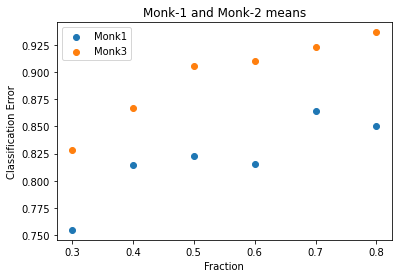

In [58]:
#Plotting scatterplot for monk1 and monk3

#Extracts only mean values
mean_list_monk1 = []
mean_list_monk3 = []
for statistics in monk1_statistics:
    mean_list_monk1.append(np.mean(statistics))
for statistics in monk3_statistics:
    mean_list_monk3.append(np.mean(statistics))  
    
#Plotting
plt.scatter(parameter_fractions, mean_list_monk1)
plt.scatter(parameter_fractions, mean_list_monk3)
plt.legend(('Monk1', 'Monk3'))
plt.ylabel("Classification Error")
plt.xlabel("Fraction")  
plt.title('Monk-1 and Monk-2 means')

Text(0.5, 1.0, 'Monk-1 statistics')

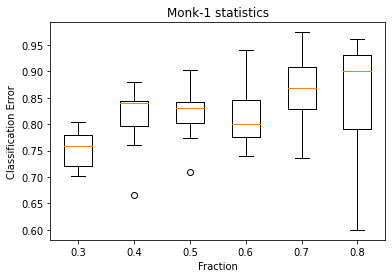

In [56]:
#Plotting boxplot for monk1 
plt.boxplot(monk1_statistics)
plt.xticks([1, 2, 3, 4, 5, 6], [0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
plt.ylabel("Classification Error")
plt.xlabel("Fraction")
plt.title('Monk-1 statistics')

Text(0.5, 1.0, 'Monk-3 statistics')

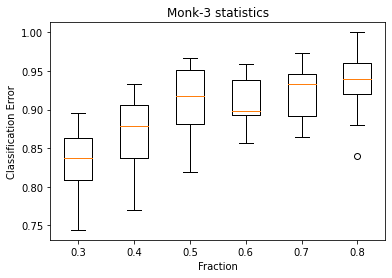

In [57]:
#Plotting boxplot for monk1 
plt.boxplot(monk3_statistics)
plt.xticks([1, 2, 3, 4, 5, 6], [0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
plt.ylabel("Classification Error")
plt.xlabel("Fraction")
plt.title('Monk-3 statistics')